# Microsoft Movie Studios

**Author:** Jeffrey W Beech
***

![director_shot.jpeg](attachment:director_shot.jpeg)

## Overview

This project analyzes the creative needs of <a href="http://www.microsoft.com">Microsoft</a>, an expansive computer software and hardware manufacturer.  Microsoft has made a strategic decision to create a new movie studio. Analysis of popular film genres and financial data from the Internet Movie Database <a href="http://www.imdb.com/interfaces/">(IMDb)</a> clearly shows that top grossing films are centered around a few film types.  Additionaly, one studio group stands out as the creative leader in these genres.  Microsoft can use this analysis to set visioning, hiring practices, property acqusition and advertising for their initial resource allocation.

## Business Problem

Microsoft has decided to expand its considerable expertise into the area of producing feature films.  As a new entry into this competitive and creative arena, they need an analysis of the types of films that are doing best at the box office.  Using data from the Internet Movie Database <a href="http://www.imdb.com/interfaces/">(IMDb)</a>  and Box Office Mojo<a href="http://www.boxofficemojo.com/"> (BOM)</a>, I will describe patterns from succesful production houses. By analyzing and comparing film generes, gross receipts, year to year consistency and studio success, this analysis will aid Microsoft in clarifying the vision, culture and resource management for their new subsidiary.

## Data Understanding

The three data sets we are using are from the Internet Movie Database (IMDb) and a subsiderary company, Box Office Mojo (BOM).  Both are owned by Amazon, and represent the largest repository of film data available.  These files have information about movie genres, gross receipts domestically and abroad, plus basic things like titles, release year, studios, runtime, etc.

### ***ADD MENTION OF ROTTEN TOMATOES***

### CHANGE PRONOUNS

In [2]:
# Import relevant modules

import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(color_codes=True)

In [3]:
!ls data

bom.movie_gross.csv  rt.reviews.tsv    title.principals.csv
df_all3.csv	     title.akas.csv    title.ratings.csv
name.basics.csv      title.basics.csv  tmdb.movies.csv
rt.movie_info.tsv    title.crew.csv    tn.movie_budgets.csv


In [4]:
# Title, Studio, Domestic Gross, Foreign Gross, Year
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')

# Name variable (nconst), Name of Crew/Principal, Primary Profession, Known for Titles (tconst)
people_info_df = pd.read_csv('data/name.basics.csv')

# ID, Rating, Genre, Director, Writer, Theater Date, Box Office, Runtime, Studio
rt_movie_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

# ID, Rating, Fresh, Top Critic
rt_movie_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin1')

# Title ID, Title, Region, Language
title_akas_df = pd.read_csv('data/title.akas.csv')

# Title ID (tconst), Primary Title, Original Title, Year, Runtime, Genres
title_basics_df = pd.read_csv('data/title.basics.csv')

# Title ID (tconst), Directors (nconst), Writers (nconst)
title_crew_df = pd.read_csv('data/title.crew.csv')

# Title ID (tconst), People (nconst), Category (primary profession)
title_principals_df = pd.read_csv('data/title.principals.csv')

# Titled ID (tconst), Rating, Num Votes
title_ratings_df = pd.read_csv('data/title.ratings.csv')

# Genre, Language, Original Title, Popularity, Date, Title, Average Rating, Num of Ratings
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv')

# Release Date, Title, Budget, Domestic Gross, Worldwide Gross
movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

In [5]:
movie_budgets_clean = movie_budgets_df.dropna(subset=['production_budget', 'domestic_gross', 'worldwide_gross'], how='any')

movie_budgets_numeric = movie_budgets_clean
movie_budgets_numeric[movie_budgets_numeric.columns[3:]] = movie_budgets_numeric[movie_budgets_numeric.columns[3:]].apply(lambda x: x.str[1:].str.split(',').str.join('')).astype(np.int64)

roi_df = movie_budgets_numeric[movie_budgets_numeric.domestic_gross !=0]
roi_df = roi_df[roi_df.worldwide_gross !=0]

roi_df['roi'] = (roi_df['worldwide_gross'] - roi_df['production_budget']) / roi_df['production_budget'] * 100

roi_recent = roi_df
roi_recent['release_date'] = pd.to_datetime(roi_recent['release_date'], format='%b %d, %Y')
roi_recent = roi_recent[roi_recent['release_date'] >= pd.Timestamp(2008, 1, 1, 12)]

profits_roi_df = roi_df
profits_roi_df['profit'] = profits_roi_df['worldwide_gross'] - profits_roi_df['production_budget']

profits_recent = profits_roi_df
profits_recent = profits_recent[profits_recent['release_date'] >= pd.Timestamp(2008, 1, 1, 12)]

profits_recent['day_of_year'] = profits_recent['release_date'].dt.dayofyear

profits_recent.head(50)


<ipython-input-5-3610c5bd37ac>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_recent['day_of_year'] = profits_recent['release_date'].dt.dayofyear


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,2351345279,352
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,635063875,140
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,-200237650,158
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,1072413963,121
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,999721747,349
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,571.016739,1747311220,352
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,582.711400,1748134200,117
8,9,2017-11-17,Justice League,300000000,229024295,655945209,118.648403,355945209,321
9,10,2015-11-06,Spectre,300000000,200074175,879620923,193.206974,579620923,310
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,294.341491,809439099,202


### ***Make a graph to show top movies by profit***

In [6]:
profits_recent_mov_index = profits_recent.set_index('movie')
title_basics_mov_index = title_basics_df.set_index('primary_title')

profits_genre = profits_recent_mov_index.join(title_basics_mov_index, how='left')

profits_genre.sort_values('profit', ascending=False)

,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year,tconst,original_title,start_year,runtime_minutes,genres
Avatar,1,2009-12-18,425000000,760507625,2776345279,553.257713,2351345279,352,tt1775309,Abatâ,2011.0,93.0,Horror
Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
Star Wars Ep. VII: The Force Awakens,6,2015-12-18,306000000,936662225,2053311220,571.016739,1747311220,352,NaN,NaN,NaN,NaN,NaN
Jurassic World,34,2015-06-12,215000000,652270625,1648854864,666.909239,1433854864,163,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
Furious 7,67,2015-04-03,190000000,353007020,1518722794,699.327786,1328722794,93,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Promise,78,2017-04-21,90000000,8224288,10551417,-88.276203,-79448583,111,tt4192918,The Promise,2017.0,NaN,Comedy
The Promise,78,2017-04-21,90000000,8224288,10551417,-88.276203,-79448583,111,tt10013288,The Promise,2017.0,NaN,Drama
Men in Black: International,42,2019-06-14,110000000,3100000,3100000,-97.181818,-106900000,165,tt2283336,Men in Black: International,2019.0,115.0,"Action,Adventure,Comedy"
Mars Needs Moms,94,2011-03-11,150000000,21392758,39549758,-73.633495,-110450242,70,tt1305591,Mars Needs Moms,2011.0,88.0,"Adventure,Animation,Family"


In [7]:
profits_genre.at[profits_genre.index[0], 'genres'] = 'Action,Adventure,Sci-Fi'

In [8]:
profits_genre["genres"] = profits_genre["genres"].replace(np.nan, "Action,Adventure")

In [9]:
profits_genre["genres_clean"] = profits_genre["genres"].str.split(",")
profits_genre.reset_index(inplace=True)


In [10]:
profits_genre.sort_values('profit', ascending=False, inplace=True)

In [11]:
profits_genre.head(30)

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year,tconst,original_title,start_year,runtime_minutes,genres,genres_clean
213,Avatar,1,2009-12-18,425000000,760507625,2776345279,553.257713,2351345279,352,tt1775309,Abatâ,2011.0,93.0,Horror,[Horror]
215,Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
1967,Star Wars Ep. VII: The Force Awakens,6,2015-12-18,306000000,936662225,2053311220,571.016739,1747311220,352,NaN,NaN,NaN,NaN,"Action,Adventure","[Action, Adventure]"
1138,Jurassic World,34,2015-06-12,215000000,652270625,1648854864,666.909239,1433854864,163,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
773,Furious 7,67,2015-04-03,190000000,353007020,1518722794,699.327786,1328722794,93,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller","[Action, Crime, Thriller]"
2087,The Avengers,27,2012-05-04,225000000,623279547,1517935897,574.638176,1292935897,125,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
880,Harry Potter and the Deathly Hallows: Part II,61,2011-07-15,125000000,381193157,1341693157,973.354526,1216693157,196,NaN,NaN,NaN,NaN,"Action,Adventure","[Action, Adventure]"
292,Black Panther,42,2018-02-16,200000000,700059566,1348258224,574.129112,1148258224,47,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
1139,Jurassic World: Fallen Kingdom,13,2018-06-22,170000000,417719760,1305772799,668.101646,1135772799,173,tt4881806,Jurassic World: Fallen Kingdom,2018.0,128.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
766,Frozen,56,2013-11-22,150000000,400738009,1272469910,748.313273,1122469910,326,tt2294629,Frozen,2013.0,102.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]"


In [12]:
top_100 = profits_genre[:100]
top_100.head()

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year,tconst,original_title,start_year,runtime_minutes,genres,genres_clean
213,Avatar,1,2009-12-18,425000000,760507625,2776345279,553.257713,2351345279,352,tt1775309,Abatâ,2011.0,93.0,Horror,[Horror]
215,Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
1967,Star Wars Ep. VII: The Force Awakens,6,2015-12-18,306000000,936662225,2053311220,571.016739,1747311220,352,NaN,NaN,NaN,NaN,"Action,Adventure","[Action, Adventure]"
1138,Jurassic World,34,2015-06-12,215000000,652270625,1648854864,666.909239,1433854864,163,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
773,Furious 7,67,2015-04-03,190000000,353007020,1518722794,699.327786,1328722794,93,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller","[Action, Crime, Thriller]"


### AVATAR SHOULD NOT BE HORROR - FIX IT

In [13]:
top8_genres = pd.pivot_table(top_100.explode("genres_clean"),index="genres_clean",values="index",aggfunc="count").sort_values("index",ascending=False)[:8]

In [14]:
top8_genres

,index
genres_clean,
Adventure,75
Action,58
Sci-Fi,20
Comedy,19
Fantasy,17
Animation,16
Drama,9
Family,9


<AxesSubplot:ylabel='genres_clean'>

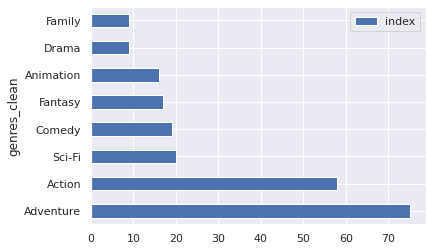

In [15]:
top8_genres.plot.barh()

In [24]:
df_all3 = pd.read_csv('./data/df_all3.csv')

## Analysis

## Top Grossing Films

We'll look at the most obvious stat first - top 25 grossing films worldwide by title.

In [25]:
#Hard coding to add missing values

df_replace_na = df_all3.nlargest(25,'worldwide_gross')
df_replace_na_select = df_replace_na[['title', 'genres', 'year', 'studio','worldwide_gross', 'domestic_gross']]

# Avatar
df_replace_na_select.at[df_replace_na_select.index[0], 'genres'] = 'Action,Adventure,Sci-Fi'
df_replace_na_select.at[df_replace_na_select.index[0], 'year'] = '2009'
df_replace_na_select.at[df_replace_na_select.index[0], 'studio'] = '20th Century Fox'

# Titanic
df_replace_na_select.at[df_replace_na_select.index[1], 'year'] = '1997'
df_replace_na_select.at[df_replace_na_select.index[1], 'studio'] = 'Paramount'

# Star Wars VII
df_replace_na_select.at[df_replace_na_select.index[2], 'genres'] = 'Action,Adventure,Sci-Fi'
df_replace_na_select.at[df_replace_na_select.index[2], 'year'] = '2015'
df_replace_na_select.at[df_replace_na_select.index[2], 'studio'] = 'Disney'

# The Avengers
df_replace_na_select.at[df_replace_na_select.index[6], 'year'] = '2012'
df_replace_na_select.at[df_replace_na_select.index[6], 'studio'] = 'Disney'

# Harry Potter - Deathly Hallows 2
df_replace_na_select.at[df_replace_na_select.index[9], 'genres'] = 'Action,Adventure,Sci-Fi'
df_replace_na_select.at[df_replace_na_select.index[9], 'year'] = '2011'
df_replace_na_select.at[df_replace_na_select.index[9], 'studio'] = 'Warner Bros'

# Star Wars VIII
df_replace_na_select.at[df_replace_na_select.index[10], 'genres'] = 'Action,Adventure,Sci-Fi'
df_replace_na_select.at[df_replace_na_select.index[10], 'year'] = '2017'
df_replace_na_select.at[df_replace_na_select.index[10], 'studio'] = 'Disney'

# Beauty and the Beast
df_replace_na_select.at[df_replace_na_select.index[13], 'year'] = '2017'
df_replace_na_select.at[df_replace_na_select.index[13], 'studio'] = 'Disney'

In [27]:
df_replace_na_select = df_replace_na_select[df_replace_na_select['year'] >= 2008]
df_replace_na_select

,title,genres,year,studio,worldwide_gross,domestic_gross
0,Avatar,"Action,Adventure,Sci-Fi",2009.0,20th Century Fox,2776345279,760507625
5,Star Wars Ep. VII: The Force Awakens,"Action,Adventure,Sci-Fi",2015.0,Disney,2053311220,936662225
6,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018.0,Disney,2048134200,678815482
33,Jurassic World,"Action,Adventure,Sci-Fi",2015.0,Universal,1648854864,652270625
66,Furious 7,"Action,Crime,Thriller",2015.0,Universal,1518722794,353007020
26,The Avengers,"Action,Adventure,Sci-Fi",2012.0,Disney,1517935897,623279547
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015.0,Disney,1403013963,459005868
41,Black Panther,"Action,Adventure,Sci-Fi",2018.0,Disney,1348258224,700059566
260,Harry Potter and the Deathly Hallows: Part II,"Action,Adventure,Sci-Fi",2011.0,Warner Bros,1341693157,381193157
4,Star Wars Ep. VIII: The Last Jedi,"Action,Adventure,Sci-Fi",2017.0,Disney,1316721747,620181382


In [28]:
df_topwwg = df_replace_na_select.nlargest(15,'worldwide_gross') # top 25 films sorted by 'worldwide_gross'
df_topwwg_select = df_topwwg[['title', 'genres', 'year', 'studio','worldwide_gross', 'domestic_gross']]
df_topwwg_select

,title,genres,year,studio,worldwide_gross,domestic_gross
0,Avatar,"Action,Adventure,Sci-Fi",2009.0,20th Century Fox,2776345279,760507625
5,Star Wars Ep. VII: The Force Awakens,"Action,Adventure,Sci-Fi",2015.0,Disney,2053311220,936662225
6,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018.0,Disney,2048134200,678815482
33,Jurassic World,"Action,Adventure,Sci-Fi",2015.0,Universal,1648854864,652270625
66,Furious 7,"Action,Crime,Thriller",2015.0,Universal,1518722794,353007020
26,The Avengers,"Action,Adventure,Sci-Fi",2012.0,Disney,1517935897,623279547
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015.0,Disney,1403013963,459005868
41,Black Panther,"Action,Adventure,Sci-Fi",2018.0,Disney,1348258224,700059566
260,Harry Potter and the Deathly Hallows: Part II,"Action,Adventure,Sci-Fi",2011.0,Warner Bros,1341693157,381193157
4,Star Wars Ep. VIII: The Last Jedi,"Action,Adventure,Sci-Fi",2017.0,Disney,1316721747,620181382


In [29]:
df_select = df_topwwg_select.copy()
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 22
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            15 non-null     object 
 1   genres           15 non-null     object 
 2   year             15 non-null     float64
 3   studio           15 non-null     object 
 4   worldwide_gross  15 non-null     int64  
 5   domestic_gross   15 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 840.0+ bytes


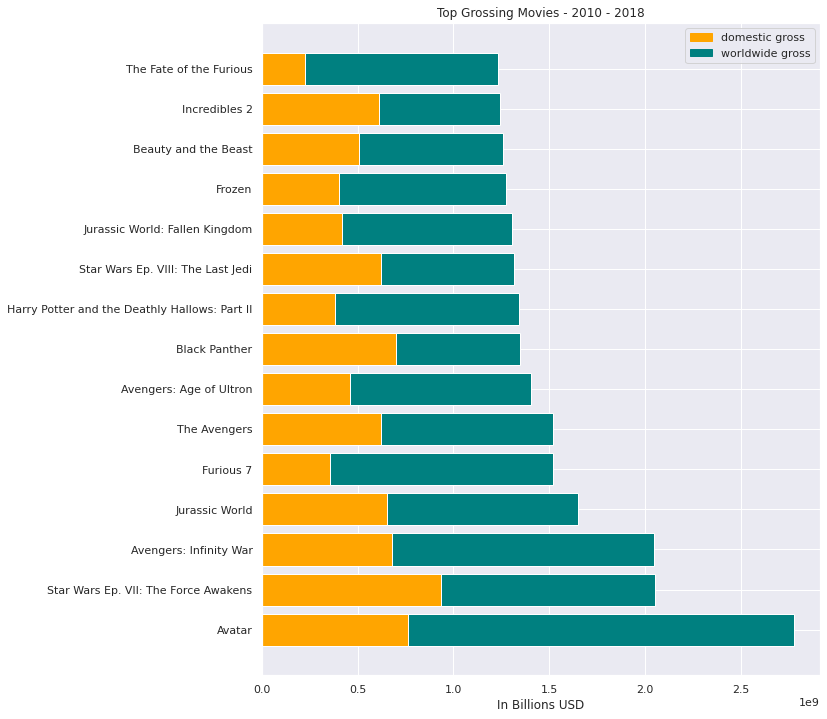

In [31]:
# Create plot
fig, ax = plt.subplots(figsize = (10,12))
title = df_select['title']
ww_gross = df_select['worldwide_gross']
d_gross = df_select['domestic_gross']

ax.set_title('Top Grossing Movies - 2010 - 2018')
ax.set_xlabel('In Billions USD')

orange_patch = mpatches.Patch(color='orange', label='domestic gross')
plt.legend(handles=[orange_patch])
teal_patch = mpatches.Patch(color='teal', label='worldwide gross')
plt.legend(handles=[orange_patch, teal_patch])

Domestic = ax.barh(title, ww_gross, color = 'teal')
World = ax.barh(title, d_gross, color = 'orange')

#plt.savefig('images/top_grossing_movies.png', dpi=300, bbox_inches = "tight")
plt.show();

In [32]:
# Summed values for next chart
sum_ups = df_select.groupby(['studio',]).sum('worldwide_gross').reset_index()
sum_ups = sum_ups.sort_values('worldwide_gross', ascending = False)
sum_ups

,studio,year,worldwide_gross,domestic_gross
1,Disney,18143.0,13461565578,5531337988
2,Universal,8065.0,5708196724,1648762170
0,20th Century Fox,2009.0,2776345279,760507625
3,Warner Bros,2011.0,1341693157,381193157


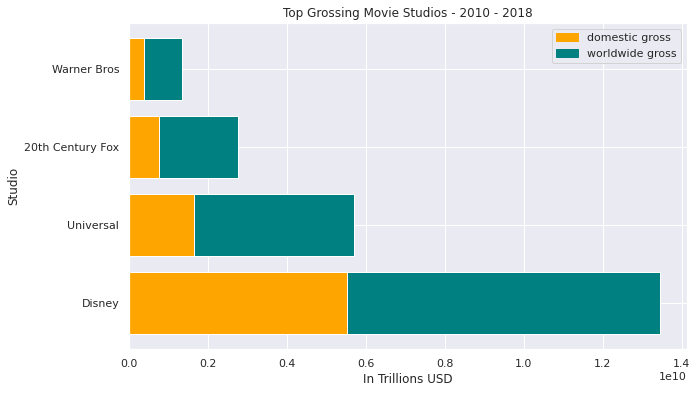

In [34]:
fig, ax = plt.subplots(figsize = (10,6))
studio = sum_ups['studio']
ww_gross = sum_ups['worldwide_gross']
d_gross = sum_ups['domestic_gross']

World = ax.barh(studio, ww_gross, color = 'teal')
Domestic = ax.barh(studio, d_gross, color = 'orange')

ax.set_title('Top Grossing Movie Studios - 2010 - 2018')
ax.set_xlabel('In Trillions USD')
ax.set_ylabel('Studio')

orange_patch = mpatches.Patch(color='orange', label='domestic gross')
plt.legend(handles=[orange_patch])
teal_patch = mpatches.Patch(color='teal', label='worldwide gross')
plt.legend(handles=[orange_patch, teal_patch])
          
#plt.savefig('images/top_grossing_movies_by_studio.pdf', dpi=300, bbox_inches = "tight")
plt.show()

### THIS GRAPH ANSWERS WHAT GENRE ARE THE TOP PROFIT MOVIES

Get rid of the index

Retitle the label

Numbers are out of 100, so can be percent.

### ***Question No 1a: INSERT HERE DIRECTORS CORRELATION TO MONEY***

### Question No 3: mini studios relative profits of big budget movies vs middle and low budget movies

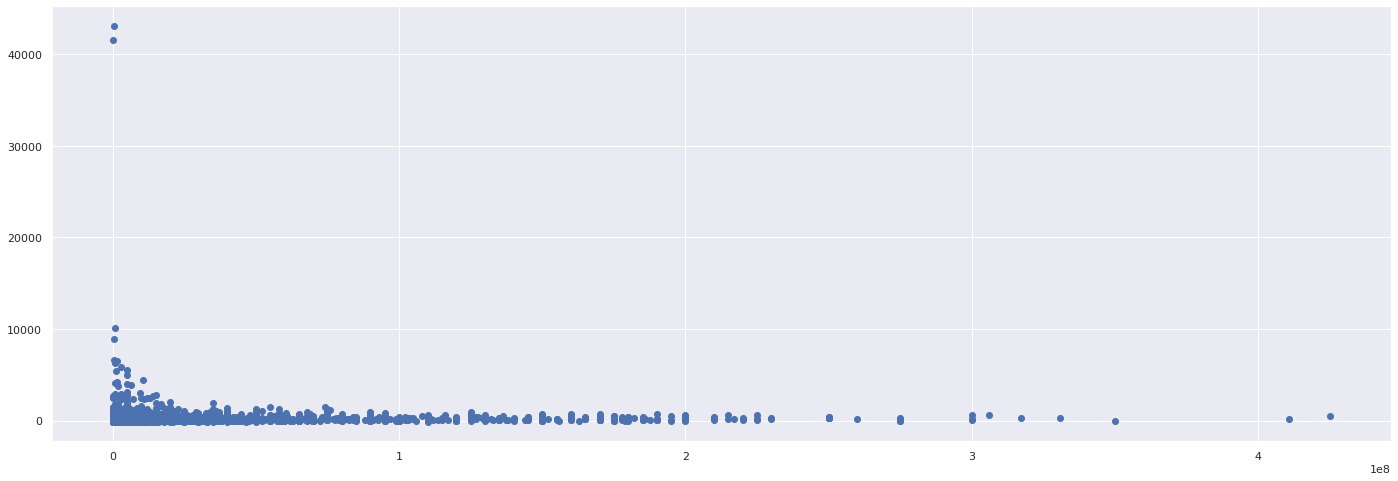

In [16]:
sns.set(rc={"figure.figsize":(24, 8)})

fig, ax = plt.subplots()

ax.scatter(roi_recent['production_budget'], roi_recent['roi']);

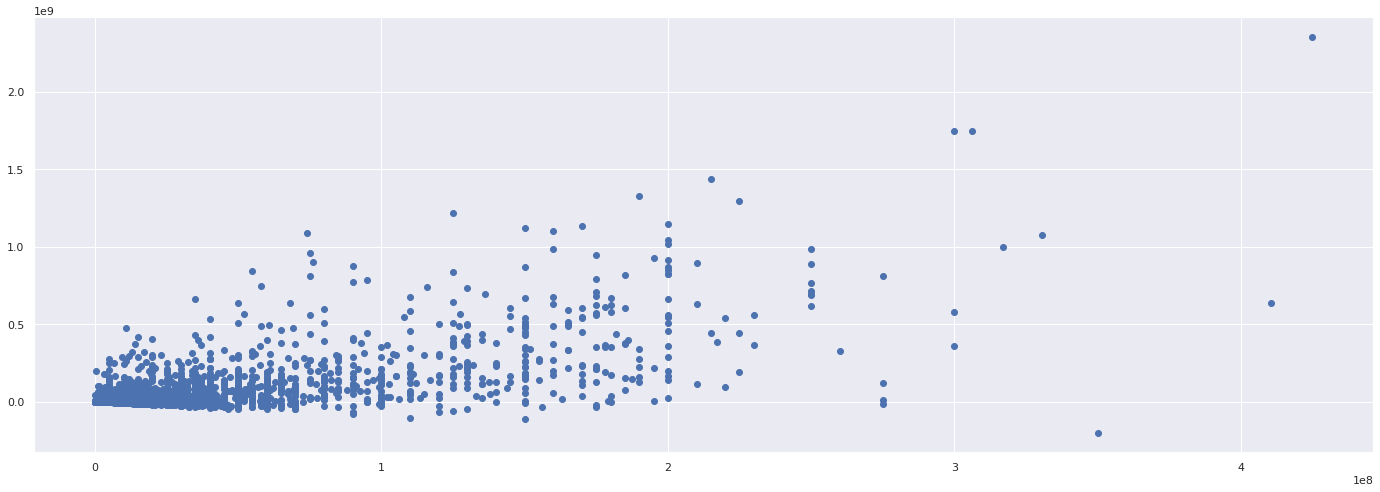

In [20]:
fig, ax = plt.subplots()

ax.scatter(profits_recent['production_budget'], profits_recent['profit']);

In [18]:
print('The correlation between production budget and profit is {}.'.format(round(np.corrcoef(profits_recent['production_budget'], profits_recent['profit'])[0][1], 3)))
print('The correlation between production budget and roi is {}.'.format(round(np.corrcoef(profits_recent['production_budget'], profits_recent['roi'])[0][1], 3)))

The correlation between production budget and profit is 0.672.
The correlation between production budget and roi is -0.043.


### Rethink this graph maybe? Is there a better way to show this? Consider adding lines to denote low budget, middle budget, and high budget categories.

### Potentially use the histograms to show all of this instead. For low budget movies, make histogram for horror, and if that is mostly in the black, then recommend that Microsoft's low budget fare be mostly horror. 

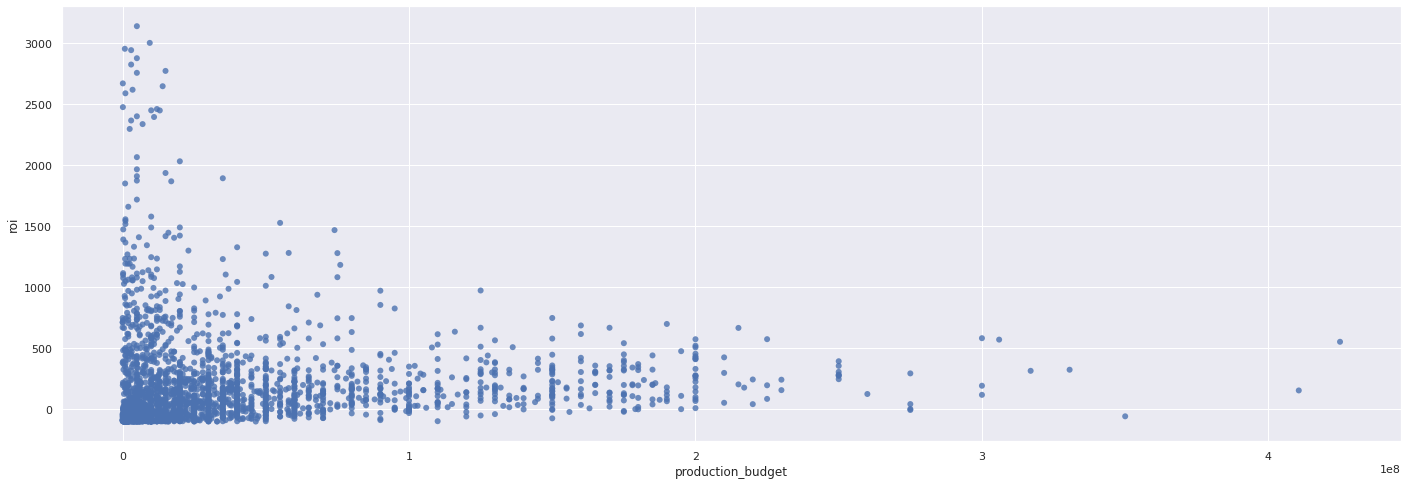

In [22]:
roi_recent_no_outliers = roi_recent

roi_recent_no_outliers = roi_recent_no_outliers[roi_recent['roi'] < 3500]

sns.scatterplot(x='production_budget', y='roi', data=roi_recent_no_outliers, edgecolor='none', alpha=.8);

### *** ***CRITICALLY ACCLAIMED MOVIE CORRELATION TO GROSS BOX OFFICE HERE*** - OR SOMETHING ELSE

### ******Days of the Year against genres here***